# Smoothing Images

### Goals

Learn to:
    
• Blur images with various low pass filters

• Apply custom-made filters to images (2D convolution)

### 2D Convolution ( Image Filtering )

As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF),
etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.

https://www.youtube.com/watch?v=XuD4C8vJzEQ&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=2

OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image. As an example, we will try an
averaging filter on an image. A 5x5 averaging filter kernel can be defined as follows:

$$
K=
\frac{1}{25}
\begin{bmatrix}
1&1&1&1&1 \\
1&1&1&1&1 \\
1&1&1&1&1 \\
1&1&1&1&1 \\
1&1&1&1&1
\end{bmatrix}
$$

Filtering with the above kernel results in the following being performed: for each pixel, a 5x5 window is centered on
this pixel, all pixels falling within this window are summed up, and the result is then divided by 25. 

This equates to
computing the average of the pixel values inside that window. This operation is performed for all the pixels in the
image to produce the output filtered image. Try this code and check the result:

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

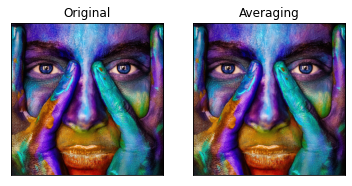

In [2]:
img = cv2.imread('girl.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### Image Blurring (Image Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It
actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this
is filter is applied. (Well, there are blurring techniques which do not blur edges). 

OpenCV provides mainly four types
of blurring techniques.

### 1. Averaging

This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels
under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or
cv2.boxFilter(). 

Check the docs for more details about the kernel. We should specify the width and height of kernel.
A 3x3 normalized box filter would look like this:

$$
K=
\frac{1}{9}
\begin{bmatrix}
1&1&1 \\
1&1&1 \\
1&1&1
\end{bmatrix}
$$

**Note:**
If you don’t want to use a normalized box filter, use cv2.boxFilter() and pass the argument
normalize=False to the function.

Check the sample demo below with a kernel of 5x5 size:

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('dark knight.jpg')
img=cv2.resize(img,(400,565))
blur = cv2.blur(img,(5,5))
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

Check the sample demo below with a kernel of 5x5 size:

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('pulp fiction.jpg')
img=cv2.resize(img,(400,565))
blur = cv2.blur(img,(5,5))
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. Gaussian Filtering

In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with
the function, cv2.GaussianBlur(). 

We should specify the width and height of the kernel which should be positive and
odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If
only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the
kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.


If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel().
The above code can be modified for Gaussian blurring:

In [5]:
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 3. Median Filtering

Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central
pixel is replaced with this median value. 

This is highly effective in removing salt-and-pepper noise. One interesting
thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may
not exist in the original image. 

However this is not the case in median filtering, since the central element is always
replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd
integer.

In this demo, we add a 50% noise to our original image and use a median filter. Check the result:

In [6]:
img1 = cv2.imread('Opencv.png')
median = cv2.medianBlur(img1,5)
cv2.imshow('original',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 4. Bilateral Filtering

As we noted, the filters we presented earlier tend to blur edges. This is not the case for the bilateral filter,
cv2.bilateralFilter(), which was defined for, and is highly effective at noise removal while preserving edges. But
the operation is slower compared to other filters. 

We already saw that a Gaussian filter takes the a neighborhood
around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is,
nearby pixels are considered while filtering. It does not consider whether pixels have almost the same intensity value
and does not consider whether the pixel lies on an edge or not. The resulting effect is that Gaussian filters tend to blur
edges, which is undesirable.

The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian
filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that
only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity
domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of
the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. 

As a result, this method
preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore
exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.
The sample below demonstrates the use of bilateral filtering (For details on arguments, see the OpenCV docs).

In [7]:
blur = cv2.bilateralFilter(img,9,75,75)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Morphological Transformations

### Goal

• We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.

• We will see different functions like : cv2.erode(), cv2.dilate(), cv2.morphologyEx() etc.

#### Theory

Morphological transformations are some simple operations based on the image shape. It is normally performed on
binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel
which decides the nature of operation. 

Two basic morphological operators are Erosion and Dilation. Then its variant
forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following
image:

![](j.PNG)

### 1. Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always
try to keep foreground in white). So what does it do? 


The kernel slides through the image (as in 2D convolution). A
pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it
is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the
thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for
removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let’s see it how it works:

In [2]:
import cv2
import numpy as np
img = cv2.imread('j.PNG',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. Dilation

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases
the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. 

So we dilate it. Since
noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

In [3]:
dilation = cv2.dilate(img,kernel,iterations = 1)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 3. Opening

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above.
Here we use the function, cv2.morphologyEx()

In [4]:
img=cv2.imread('j2.PNG')
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 4. Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground
objects, or small black points on the object.

In [5]:
img=cv2.imread('j3.PNG')
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5. Morphological Gradient

It is the difference between dilation and erosion of an image.
The result will look like the outline of the object.

In [12]:
img=cv2.imread('j.PNG')
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('res',gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Gradients

### Goal

• Find Image gradients, edges etc

• We will see following functions : cv2.Sobel(), cv2.Scharr(), cv2.Laplacian() etc

#### Theory

OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. We will see each
one of them.

### 1. Sobel and Scharr Derivatives

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You
can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder
respectively). 

You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used
which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.

### 2. Laplacian Derivatives

It calculates the Laplacian of the image given by the relation  $\Delta$src = $\frac{\partial^2 \mathbf{src}}{\partial \mathbf{x^2}}$+ $\frac{\partial^2 \mathbf{src}}{\partial \mathbf{y^2}}$ where each derivative is found
using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

$$
kernal=
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

#### Code

Below code shows all operators in a single diagram. All kernels are of 5x5 size. Depth of output image is passed -1 to
get the result in np.uint8 type.

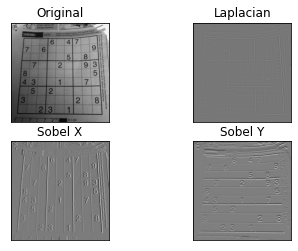

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sudoku.png',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()